In [1]:
#pip install scipy==1.6.3

In [2]:
#pip install pymc3

In [3]:
#pip install --upgrade xarray

In [4]:
#pip install --upgrade pandas

In [5]:
#pip install --upgrade numexpr

In [6]:
#pip install --upgrade statsmodels

In [7]:
#pip install --upgrade matplotlib

In [8]:
#pip install --upgrade --force-reinstall scipy numpy

In [9]:
#pip install --upgrade openpyxl

In [10]:
#pip install --upgrade  arviz

In [11]:
pip install --upgrade pymc

In [12]:
#conda install m2w64-toolchain

In [13]:
#pip install --upgrade theano numpy

In [14]:
#pip install --upgrade theano

In [15]:
#pip install --upgrade theano pymc3

In [16]:
#pip install theano

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from datetime import datetime
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import kstest
import scipy.stats as stats
import statsmodels.api as sm
import pymc as pm
import arviz as az
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [18]:
Volume_data = 'C:\\Users\\Lenovo\\Downloads\\Volume_data.xlsx'
Resultados=pd.read_excel(Volume_data, sheet_name = 'Total Compañia')
Resultados['NR'].astype('int64') 
Resultados['Volume'].astype('int64') 
print(Resultados.dtypes)
Resultados['Fecha'] =  Resultados['Año'].astype('str') + "-" + Resultados['Mes'].astype('str')
Resultados['Precio'] =  Resultados['NR'] / Resultados['Volume']
Resultados.set_index('Fecha', inplace=True)
Resultados

Año         int64
Mes         int64
Volume    float64
NR        float64
DN          int64
dtype: object


,Año,Mes,Volume,NR,DN,Precio
Fecha,,,,,,
2021-1,2021,1,139796.051369,1.616817e+07,6019,115.655404
2021-2,2021,2,158549.471359,1.896503e+07,6233,119.615861
2021-3,2021,3,221631.443417,2.594681e+07,6028,117.071879
2021-4,2021,4,187586.451825,2.207731e+07,6852,117.691412
2021-5,2021,5,198868.406978,2.324259e+07,6956,116.874198
2021-6,2021,6,194688.737361,2.272527e+07,6583,116.726142
2021-7,2021,7,163291.793902,1.895727e+07,7797,116.094422
2021-8,2021,8,164963.546272,1.956868e+07,6607,118.624273
2021-9,2021,9,184913.442942,2.165995e+07,7317,117.135591


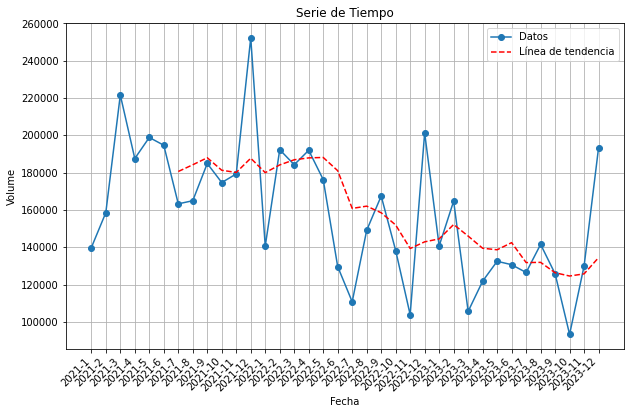

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(Resultados.index, Resultados['Volume'], marker='o', linestyle='-', label='Datos')
media_movil = Resultados['Volume'].rolling(window=7).mean()
plt.plot(Resultados.index, media_movil, 'r--', label='Línea de tendencia')
plt.xticks(rotation=45, ha='right') 
plt.gca().margins(x=0.05) 
plt.xlabel('Fecha')
plt.ylabel('Volume')
plt.title('Serie de Tiempo')
plt.legend()
plt.grid(True)
plt.show()


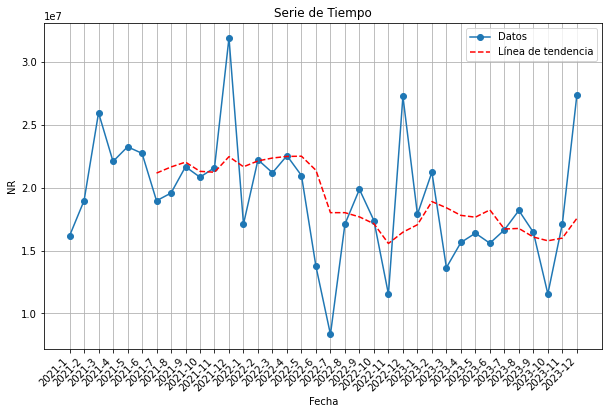

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(Resultados.index, Resultados['NR'], marker='o', linestyle='-', label='Datos')
media_movil = Resultados['NR'].rolling(window=7).mean()
plt.plot(Resultados.index, media_movil, 'r--', label='Línea de tendencia')
plt.xticks(rotation=45, ha='right') 
plt.gca().margins(x=0.05) 
plt.xlabel('Fecha')
plt.ylabel('NR')
plt.title('Serie de Tiempo')
plt.legend()
plt.grid(True)
plt.show()

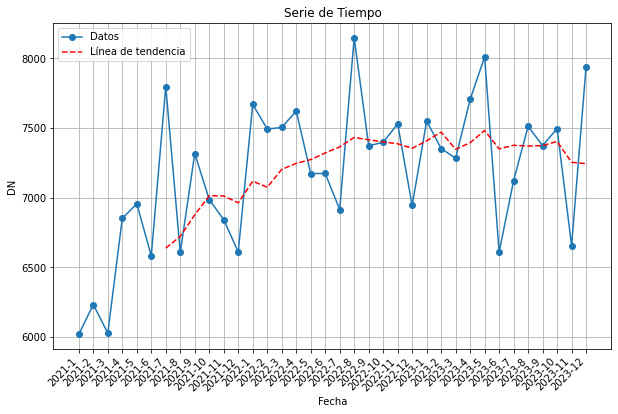

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(Resultados.index, Resultados['DN'], marker='o', linestyle='-', label='Datos')
media_movil = Resultados['DN'].rolling(window=7).mean()
plt.plot(Resultados.index, media_movil, 'r--', label='Línea de tendencia')
plt.xticks(rotation=45, ha='right') 
plt.gca().margins(x=0.05) 
plt.xlabel('Fecha')
plt.ylabel('DN')
plt.title('Serie de Tiempo')
plt.legend()
plt.grid(True)
plt.show()

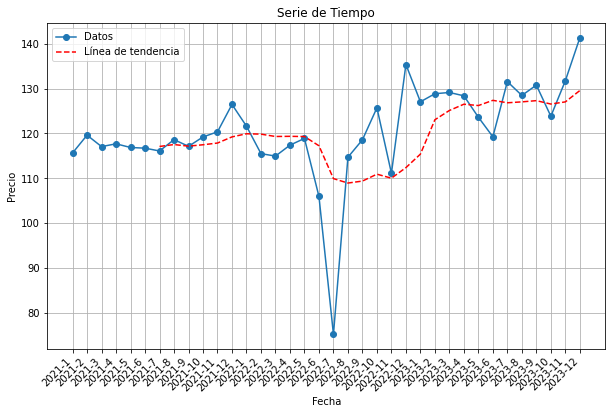

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(Resultados.index, Resultados['Precio'], marker='o', linestyle='-', label='Datos')
media_movil = Resultados['Precio'].rolling(window=7).mean()
plt.plot(Resultados.index, media_movil, 'r--', label='Línea de tendencia')
plt.xticks(rotation=45, ha='right') 
plt.gca().margins(x=0.05) 
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Serie de Tiempo')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
Resultados1=pd.read_excel(Volume_data, sheet_name = 'Nivel Marca')
Resultados1


,Año,Mes,Marca,New Vol,New NR,New DN
0,2021,1,Marca 1,5405.309564,4.450753e+05,2670
1,2021,1,Marca 2,76184.199271,8.086892e+06,5443
2,2021,1,Marca 3,9005.347750,1.085043e+06,4120
3,2021,1,Marca 4,34901.062904,4.025846e+06,4817
4,2021,1,Marca 5,4080.766579,6.585441e+05,3481
...,...,...,...,...,...,...
319,2023,12,Marca 5,8384.235652,1.652341e+06,2793
320,2023,12,Marca 6,8042.268416,2.098800e+06,3718
321,2023,12,Marca 11,0.000000,0.000000e+00,0
322,2023,12,Marca 7,5954.103502,1.161529e+06,2630


In [24]:
marcas_unicas = Resultados1['Marca'].unique()

bases_de_datos = {}

for marca in marcas_unicas:
    datos_marca = Resultados1[Resultados1['Marca'] == marca].copy()
    datos_marca['Precio'] = datos_marca['New NR'] / datos_marca['New Vol']
    datos_marca['Fecha'] =  datos_marca['Año'].astype('str') + "-" + datos_marca['Mes'].astype('str')
    datos_marca.set_index('Fecha', inplace=True)
    bases_de_datos[marca] = datos_marca



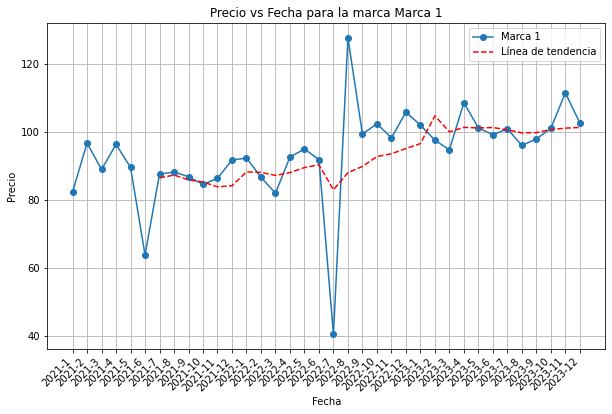

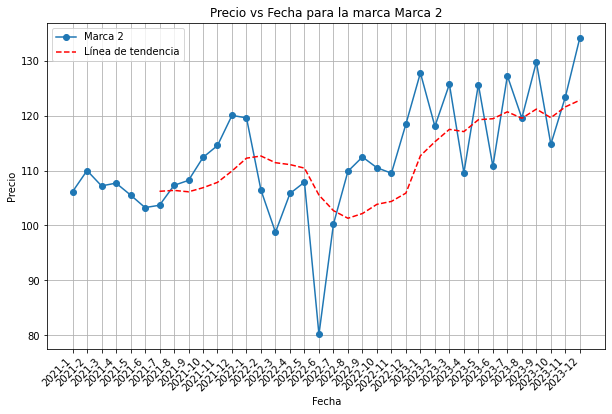

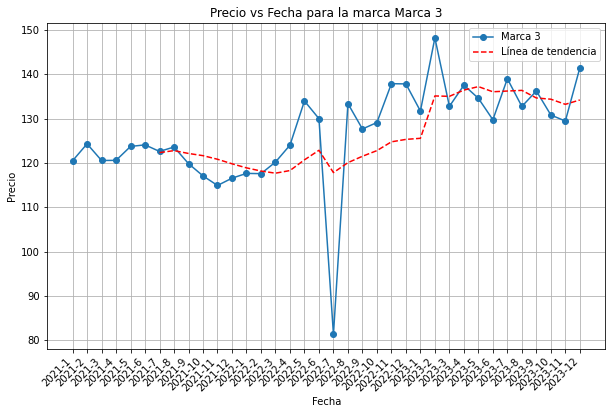

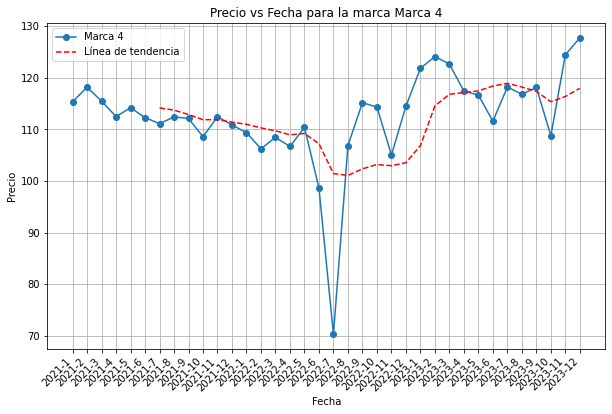

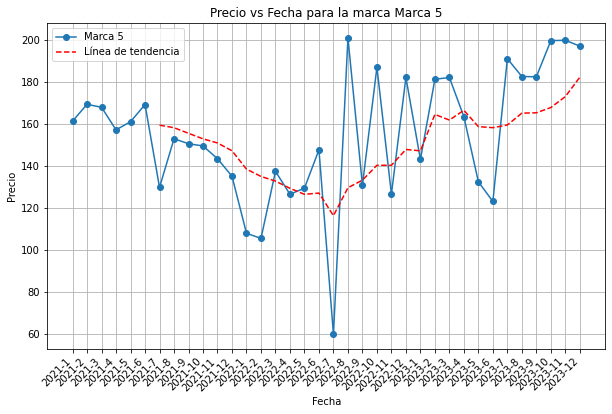

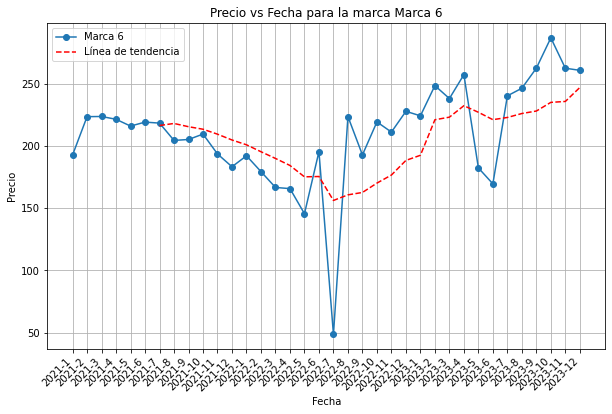

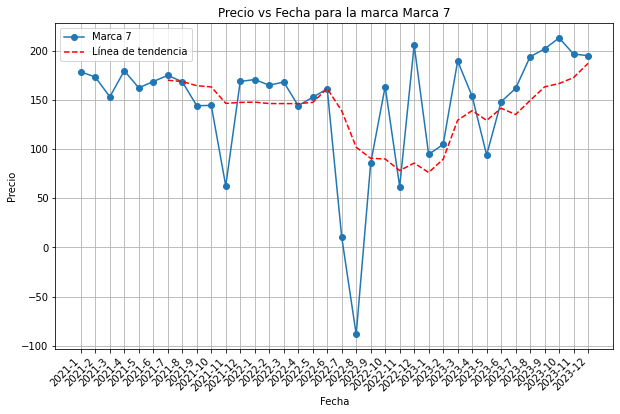

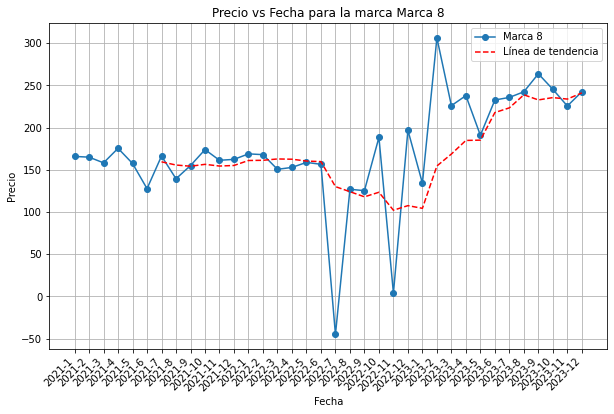

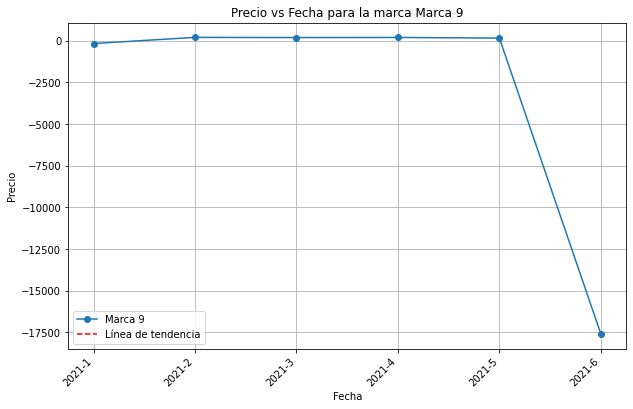

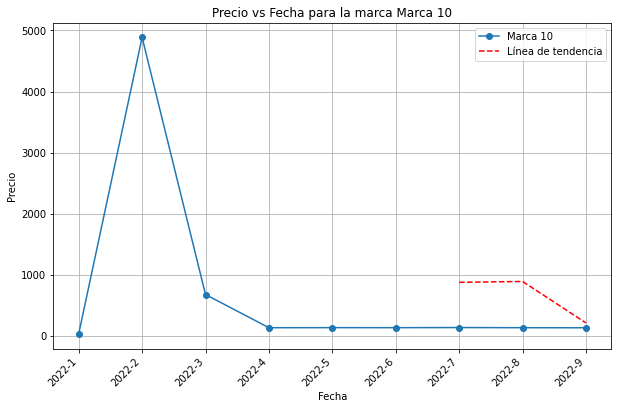

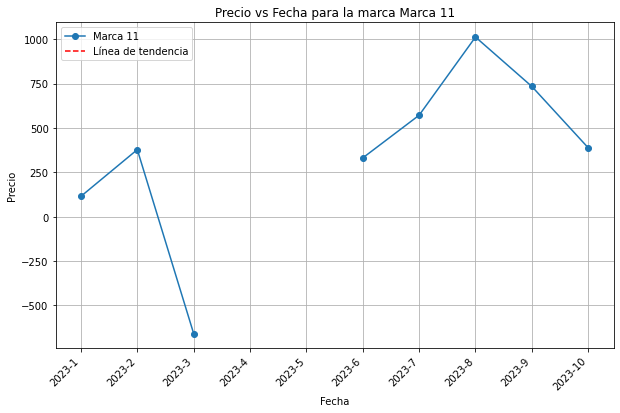

In [25]:
for marca, datos_marca in bases_de_datos.items():
  
    plt.figure(figsize=(10, 6))
    plt.plot(datos_marca.index, datos_marca['Precio'], marker='o', linestyle='-', label=marca)
    media_movil = datos_marca['Precio'].rolling(window=7).mean()
    plt.plot(datos_marca.index, media_movil, 'r--', label='Línea de tendencia')
    plt.xticks(rotation=45, ha='right') 
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.title(f'Precio vs Fecha para la marca {marca}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [26]:
Macro_data = 'C:\\Users\\Lenovo\\Downloads\\Macro Variables.xlsx'
Resultados2=pd.read_excel(Macro_data, sheet_name = 'Hoja2')
Resultados2['date'] = pd.to_datetime(Resultados2['date'])
Resultados2['fecha'] = Resultados2['date'].dt.strftime('%Y-%#m')
Resultados2.set_index('fecha', inplace=True)
print(Resultados2.dtypes)
Resultados2

date                 datetime64[ns]
CPI                         float64
Broad Money                 float64
GPD                         float64
Savings                     float64
Unemployment Rate           float64
dtype: object


,date,CPI,Broad Money,GPD,Savings,Unemployment Rate
fecha,,,,,,
2021-1,2021-01-01,98.744918,45.918736,38.207765,14.205019,11.842896
2021-2,2021-02-01,99.075215,45.918736,38.207765,14.205019,11.842896
2021-3,2021-03-01,99.291946,45.918736,38.207765,14.205019,11.842896
2021-4,2021-04-01,99.367999,36.831127,39.801554,14.205019,11.842896
2021-5,2021-05-01,99.482510,36.831127,39.801554,14.205019,11.842896
2021-6,2021-06-01,99.654597,36.831127,39.801554,14.205019,11.842896
2021-7,2021-07-01,100.109923,37.959337,42.115131,14.205019,11.842896
2021-8,2021-08-01,100.367862,37.959337,42.115131,14.205019,11.842896
2021-9,2021-09-01,100.671244,37.959337,42.115131,14.205019,11.842896


In [27]:
qa=pd.DataFrame({'CPI': Resultados2['CPI'],'Broad Money':Resultados2['Broad Money'],'GPD':Resultados2['GPD'],'Savings':Resultados2['Savings'],'Unemployment Rate':Resultados2['Unemployment Rate']})
qa

,CPI,Broad Money,GPD,Savings,Unemployment Rate
fecha,,,,,
2021-1,98.744918,45.918736,38.207765,14.205019,11.842896
2021-2,99.075215,45.918736,38.207765,14.205019,11.842896
2021-3,99.291946,45.918736,38.207765,14.205019,11.842896
2021-4,99.367999,36.831127,39.801554,14.205019,11.842896
2021-5,99.482510,36.831127,39.801554,14.205019,11.842896
2021-6,99.654597,36.831127,39.801554,14.205019,11.842896
2021-7,100.109923,37.959337,42.115131,14.205019,11.842896
2021-8,100.367862,37.959337,42.115131,14.205019,11.842896
2021-9,100.671244,37.959337,42.115131,14.205019,11.842896


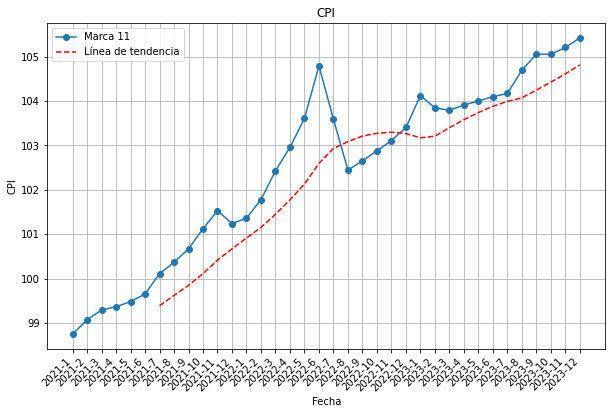

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(Resultados2.index, Resultados2['CPI'], marker='o', linestyle='-', label=marca)
media_movil =  Resultados2['CPI'].rolling(window=7).mean()
plt.plot(Resultados2.index, media_movil, 'r--', label='Línea de tendencia')
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Fecha')
plt.ylabel('CPI')
plt.title(f'CPI')
plt.legend()
plt.grid(True)
plt.show()

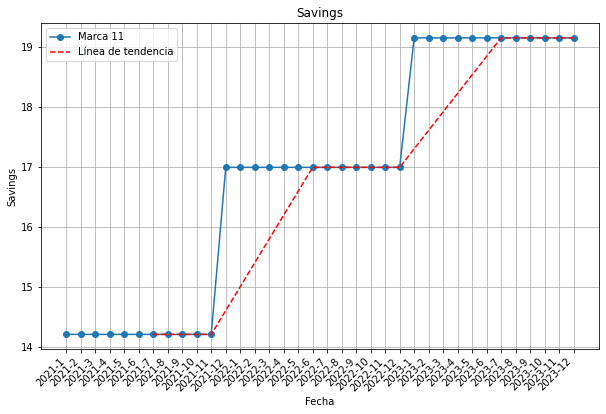

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(Resultados2.index, Resultados2['Savings'], marker='o', linestyle='-', label=marca)
media_movil =  Resultados2['Savings'].rolling(window=7).mean()
plt.plot(Resultados2.index, media_movil, 'r--', label='Línea de tendencia')
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Fecha')
plt.ylabel('Savings')
plt.title(f'Savings')
plt.legend()
plt.grid(True)
plt.show()

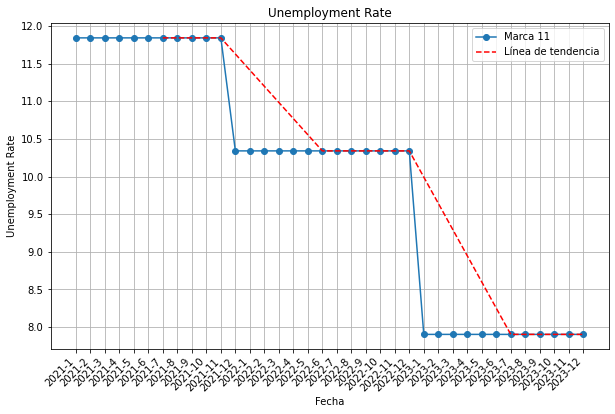

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(Resultados2.index, Resultados2['Unemployment Rate'], marker='o', linestyle='-', label=marca)
media_movil =  Resultados2['Unemployment Rate'].rolling(window=7).mean()
plt.plot(Resultados2.index, media_movil, 'r--', label='Línea de tendencia')
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Fecha')
plt.ylabel('Unemployment Rate')
plt.title(f'Unemployment Rate')
plt.legend()
plt.grid(True)
plt.show()

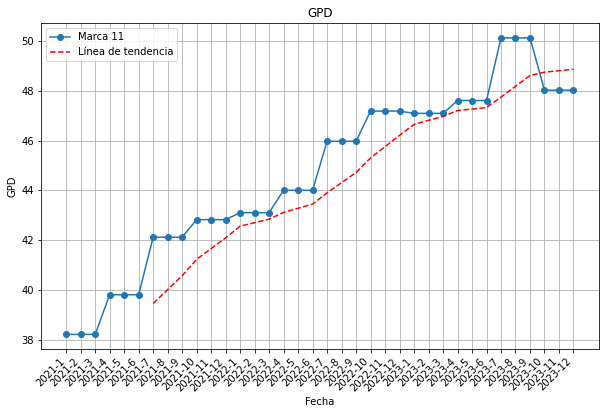

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(Resultados2.index, Resultados2['GPD'], marker='o', linestyle='-', label=marca)
media_movil =  Resultados2['GPD'].rolling(window=7).mean()
plt.plot(Resultados2.index, media_movil, 'r--', label='Línea de tendencia')
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Fecha')
plt.ylabel('GPD')
plt.title(f'GPD')
plt.legend()
plt.grid(True)
plt.show()

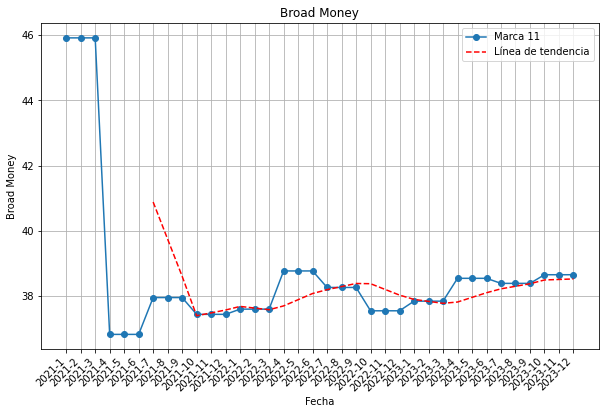

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(Resultados2.index, Resultados2['Broad Money'], marker='o', linestyle='-', label=marca)
media_movil =  Resultados2['Broad Money'].rolling(window=7).mean()
plt.plot(Resultados2.index, media_movil, 'r--', label='Línea de tendencia')
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Fecha')
plt.ylabel('Broad Money')
plt.title(f'Broad Money')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
qa['PPA']=Resultados2['Savings']/Resultados2['GPD']
qa['PPA']

fecha
2021-1     0.371784
2021-2     0.371784
2021-3     0.371784
2021-4     0.356896
2021-5     0.356896
2021-6     0.356896
2021-7     0.337290
2021-8     0.337290
2021-9     0.337290
2021-10    0.331730
2021-11    0.331730
2021-12    0.396803
2022-1     0.394221
2022-2     0.394221
2022-3     0.394221
2022-4     0.386161
2022-5     0.386161
2022-6     0.386161
2022-7     0.369606
2022-8     0.369606
2022-9     0.369606
2022-10    0.360103
2022-11    0.360103
2022-12    0.360103
2023-1     0.406670
2023-2     0.406670
2023-3     0.406670
2023-4     0.402256
2023-5     0.402256
2023-6     0.402256
2023-7     0.382041
2023-8     0.382041
2023-9     0.382041
2023-10    0.398758
2023-11    0.398758
2023-12    0.398758
Name: PPA, dtype: float64

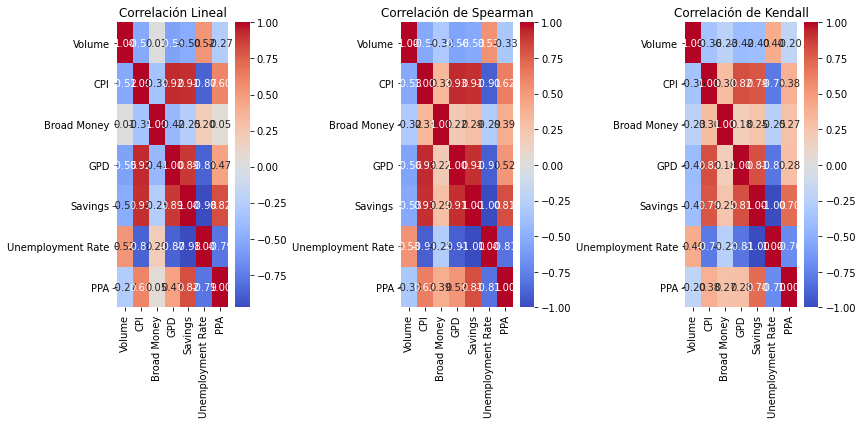

In [34]:
datos=pd.DataFrame({'Volume': Resultados['Volume'],'CPI': qa['CPI'],'Broad Money':qa['Broad Money'],'GPD':qa['GPD'],'Savings':qa['Savings'],'Unemployment Rate':qa['Unemployment Rate'],'PPA':qa['PPA']})
correlacion_lineal = datos.corr()
correlacion_spearman = datos.corr(method='spearman')
correlacion_kendall = datos.corr(method='kendall')

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.heatmap(correlacion_lineal, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación Lineal')

plt.subplot(1, 3, 2)
sns.heatmap(correlacion_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de Spearman')

plt.subplot(1, 3, 3)
sns.heatmap(correlacion_kendall, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de Kendall')

plt.tight_layout()
plt.show()

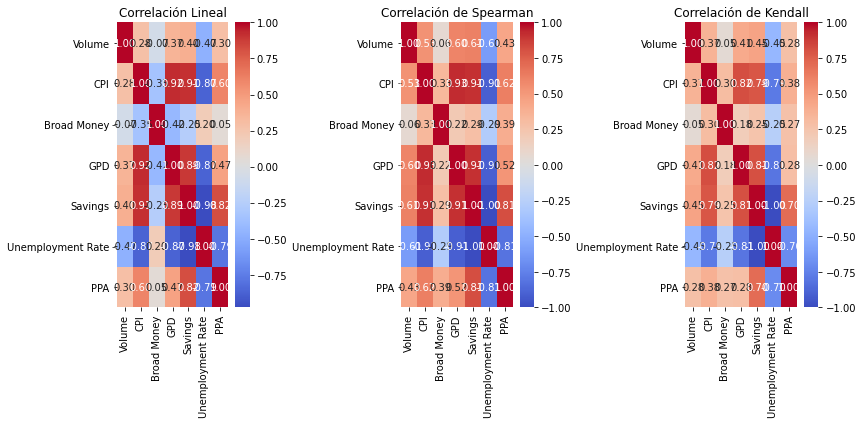

In [35]:
datos=pd.DataFrame({'Volume': Resultados['Precio'],'CPI': qa['CPI'],'Broad Money':qa['Broad Money'],'GPD':qa['GPD'],'Savings':qa['Savings'],'Unemployment Rate':qa['Unemployment Rate'],'PPA':qa['PPA']})
correlacion_lineal = datos.corr()
correlacion_spearman = datos.corr(method='spearman')
correlacion_kendall = datos.corr(method='kendall')

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.heatmap(correlacion_lineal, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación Lineal')

plt.subplot(1, 3, 2)
sns.heatmap(correlacion_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de Spearman')

plt.subplot(1, 3, 3)
sns.heatmap(correlacion_kendall, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de Kendall')

plt.tight_layout()
plt.show()

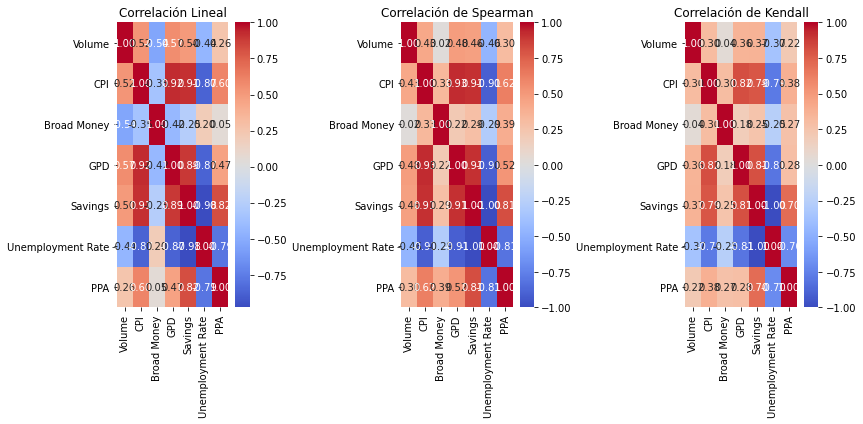

In [36]:
datos=pd.DataFrame({'Volume': Resultados['DN'],'CPI': qa['CPI'],'Broad Money':qa['Broad Money'],'GPD':qa['GPD'],'Savings':qa['Savings'],'Unemployment Rate':qa['Unemployment Rate'],'PPA':qa['PPA']})
correlacion_lineal = datos.corr()
correlacion_spearman = datos.corr(method='spearman')
correlacion_kendall = datos.corr(method='kendall')

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.heatmap(correlacion_lineal, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación Lineal')

plt.subplot(1, 3, 2)
sns.heatmap(correlacion_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de Spearman')

plt.subplot(1, 3, 3)
sns.heatmap(correlacion_kendall, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de Kendall')

plt.tight_layout()
plt.show()

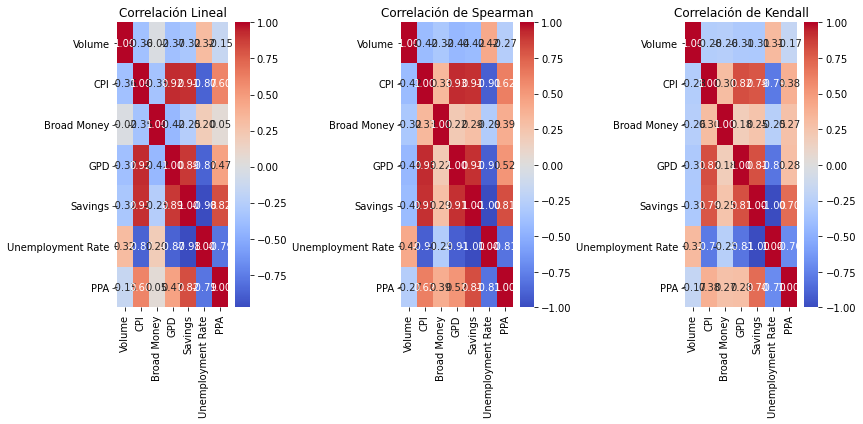

In [37]:
datos=pd.DataFrame({'Volume': Resultados['NR'],'CPI': qa['CPI'],'Broad Money':qa['Broad Money'],'GPD':qa['GPD'],'Savings':qa['Savings'],'Unemployment Rate':qa['Unemployment Rate'],'PPA':qa['PPA']})
correlacion_lineal = datos.corr()
correlacion_spearman = datos.corr(method='spearman')
correlacion_kendall = datos.corr(method='kendall')

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.heatmap(correlacion_lineal, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación Lineal')

plt.subplot(1, 3, 2)
sns.heatmap(correlacion_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de Spearman')

plt.subplot(1, 3, 3)
sns.heatmap(correlacion_kendall, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de Kendall')

plt.tight_layout()
plt.show()

La prueba de Shapiro-Wilk comprueba si una muestra proviene de una distribución normal.
Hipótesis nula (H0): Los datos provienen de una distribución normal.
Si el valor p es menor que el nivel de significancia elegido (por ejemplo, 0.05), se rechaza la hipótesis nula.

La prueba de Kolmogorov-Smirnov compara la distribución empírica de los datos con una distribución teórica.
Hipótesis nula (H0): Los datos siguen la distribución teórica especificada.
Si el valor p es menor que el nivel de significancia elegido (por ejemplo, 0.05), se rechaza la hipótesis nula.

Un gráfico Q-Q compara los cuantiles de los datos con los cuantiles de una distribución teórica.
Si los puntos se ajustan a una línea recta, sugiere que los datos se distribuyen de manera similar a la distribución teórica.

Marca 1
Estadístico de prueba: 0.964643657207489
Valor p: 0.29761621356010437
Estadístico de prueba: 1.0
Valor p: 0.0


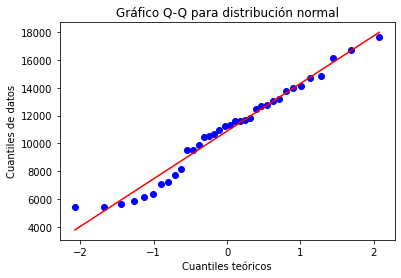

Marca 2
Estadístico de prueba: 0.9556822180747986
Valor p: 0.15777374804019928
Estadístico de prueba: 1.0
Valor p: 0.0


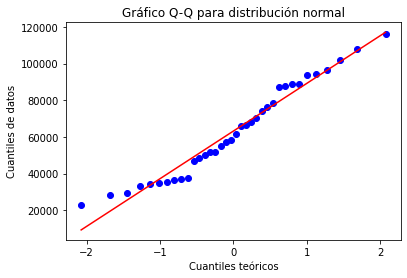

Marca 3
Estadístico de prueba: 0.9556884765625
Valor p: 0.157844677567482
Estadístico de prueba: 1.0
Valor p: 0.0


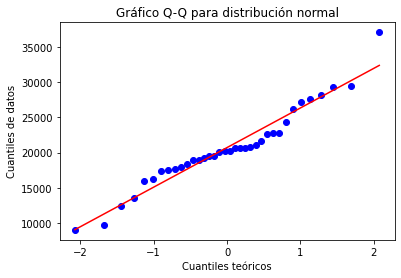

Marca 4
Estadístico de prueba: 0.9599099159240723
Valor p: 0.21359477937221527
Estadístico de prueba: 1.0
Valor p: 0.0


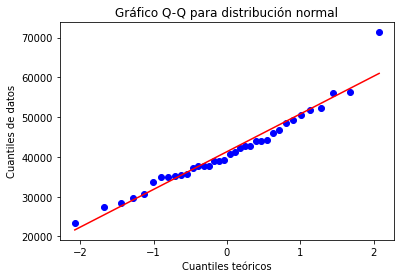

Marca 5
Estadístico de prueba: 0.6498619318008423
Valor p: 5.0284000963074504e-08
Estadístico de prueba: 1.0
Valor p: 0.0


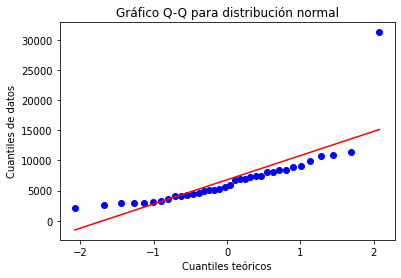

Marca 6
Estadístico de prueba: 0.8271477222442627
Valor p: 5.9142348618479446e-05
Estadístico de prueba: 1.0
Valor p: 0.0


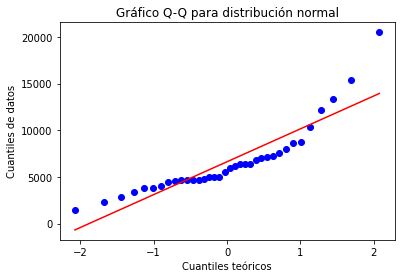

Marca 7
Estadístico de prueba: 0.8552002310752869
Valor p: 0.0002513043291401118
Estadístico de prueba: 1.0
Valor p: 0.0


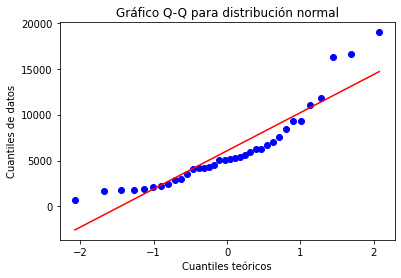

Marca 8
Estadístico de prueba: 0.884931206703186
Valor p: 0.0013552362797781825
Estadístico de prueba: 1.0
Valor p: 0.0


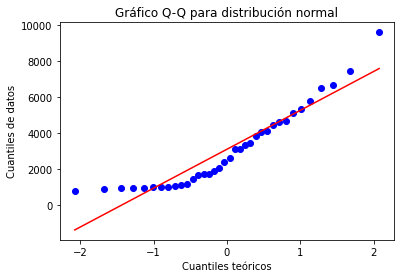

Marca 9
Estadístico de prueba: 0.6810631155967712
Valor p: 0.0003611007414292544
Estadístico de prueba: 0.5
Valor p: 0.0015737985915988593


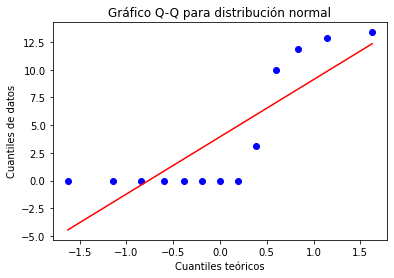

Marca 10
Estadístico de prueba: 0.8147937059402466
Valor p: 0.0138689074665308
Estadístico de prueba: 0.5706069225158771
Valor p: 0.00031788216697356184


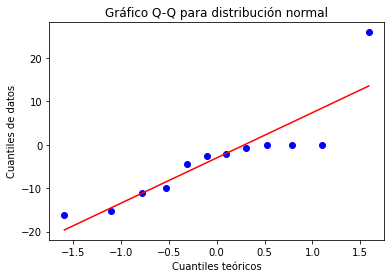

Marca 11
Estadístico de prueba: 0.38937658071517944
Valor p: 7.368097243443117e-08
Estadístico de prueba: 0.31818181818181823
Valor p: 0.17258938320257955


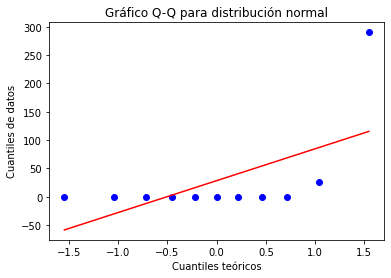

In [38]:
for marca, datos_marca in bases_de_datos.items():
    print(marca)
    estadistico, valor_p = shapiro(bases_de_datos[marca]['New Vol'])
    print("Estadístico de prueba:", estadistico)
    print("Valor p:", valor_p)
    distribucion_teorica = 'norm'
    estadistico, valor_p = kstest(bases_de_datos[marca]['New Vol'], distribucion_teorica)
    print("Estadístico de prueba:", estadistico)
    print("Valor p:", valor_p)
    stats.probplot(bases_de_datos[marca]['New Vol'], dist="norm", plot=plt)
    plt.title('Gráfico Q-Q para distribución normal')
    plt.xlabel('Cuantiles teóricos')
    plt.ylabel('Cuantiles de datos')
    plt.show()

In [39]:
marcas = Resultados1['Marca'].unique()

dataframe_consolidado = pd.DataFrame()

for nombre_tabla, tabla in bases_de_datos.items():
    if nombre_tabla in marcas:       
        dataframe_consolidado[nombre_tabla] = tabla['New Vol']

print(dataframe_consolidado)

              Marca 1        Marca 2       Marca 3       Marca 4  \
Fecha                                                              
2021-1    5405.309564   76184.199271   9005.347750  34901.062904   
2021-2    6404.111373   89129.167791  13580.562645  33763.637289   
2021-3   10961.539995  116251.423855  19438.878711  51877.781021   
2021-4   10566.250902   96476.944323  16019.666385  42648.786273   
2021-5   11605.527208  101892.068695  18374.911851  42775.676722   
2021-6    6179.537581   93817.371981  19257.174513  46816.050723   
2021-7    7118.465374   73991.667222  18927.340862  40614.692525   
2021-8    5654.526854   78756.113383  17953.260232  39066.269766   
2021-9    8157.074374   88926.567658  20167.101541  42212.304968   
2021-10   5407.222900   88045.114749  17472.040479  39300.494072   
2021-11   5868.277514   87384.726479  20686.617326  37329.406122   
2021-12   9896.690774  108174.287500  24294.177474  44129.311019   
2022-1    7207.854400   66008.428450  20621.1128

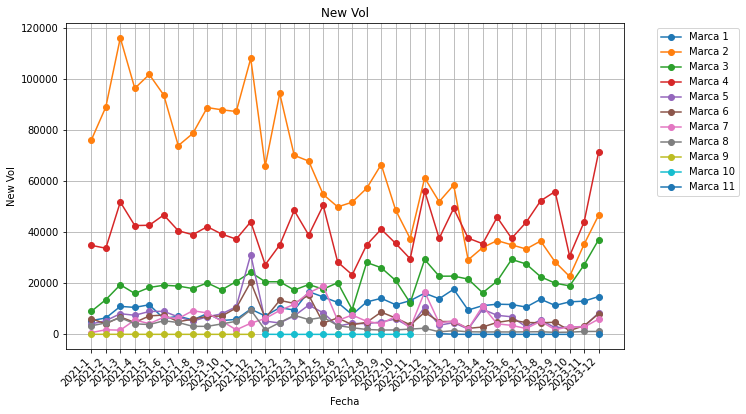

In [40]:
plt.figure(figsize=(10, 6))
for columna in dataframe_consolidado.columns:
    plt.plot(dataframe_consolidado.index, dataframe_consolidado[columna], marker='o', linestyle='-', label=columna)
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Fecha')
plt.ylabel('New Vol')
plt.title(f'New Vol')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [41]:
marcas = Resultados1['Marca'].unique()

dataframe_consolidado1 = pd.DataFrame()

for nombre_tabla, tabla in bases_de_datos.items():
    if nombre_tabla in marcas:       
        dataframe_consolidado1[nombre_tabla] = tabla['New NR']

print(dataframe_consolidado1)


              Marca 1       Marca 2       Marca 3       Marca 4       Marca 5  \
Fecha                                                                           
2021-1   4.450753e+05  8.086892e+06  1.085043e+06  4.025846e+06  6.585441e+05   
2021-2   6.193448e+05  9.803514e+06  1.688093e+06  3.990060e+06  9.038294e+05   
2021-3   9.751233e+05  1.246199e+07  2.343403e+06  5.990638e+06  1.359761e+06   
2021-4   1.018021e+06  1.039137e+07  1.931656e+06  4.797235e+06  1.175154e+06   
2021-5   1.039338e+06  1.075398e+07  2.273340e+06  4.884886e+06  1.445676e+06   
2021-6   3.945526e+05  9.687604e+06  2.389402e+06  5.256290e+06  1.528468e+06   
2021-7   6.235578e+05  7.671525e+06  2.320353e+06  4.513053e+06  8.855043e+05   
2021-8   4.987061e+05  8.450589e+06  2.218920e+06  4.391535e+06  7.914460e+05   
2021-9   7.083203e+05  9.622352e+06  2.416803e+06  4.732771e+06  1.034773e+06   
2021-10  4.573487e+05  9.894134e+06  2.045559e+06  4.266710e+06  1.203216e+06   
2021-11  5.067847e+05  1.000

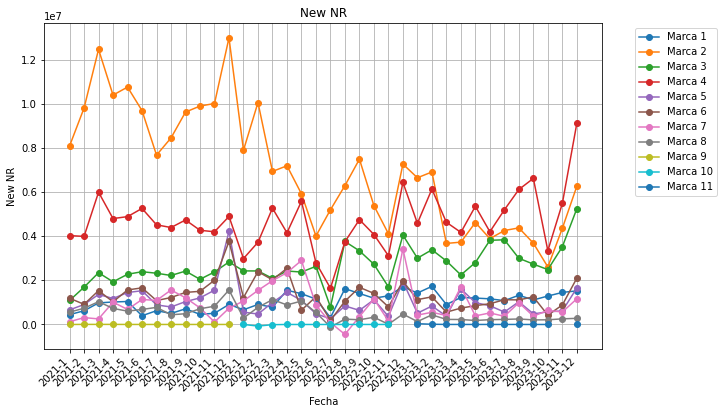

In [42]:
plt.figure(figsize=(10, 6))
for columna in dataframe_consolidado1.columns:
    plt.plot(dataframe_consolidado1.index, dataframe_consolidado1[columna], marker='o', linestyle='-', label=columna)
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Fecha')
plt.ylabel('New NR')
plt.title(f'New NR')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [43]:
marcas = Resultados1['Marca'].unique()

dataframe_consolidado2 = pd.DataFrame()

for nombre_tabla, tabla in bases_de_datos.items():
    if nombre_tabla in marcas:       
        dataframe_consolidado2[nombre_tabla] = tabla['New DN']

print(dataframe_consolidado2)

         Marca 1  Marca 2  Marca 3  Marca 4  Marca 5  Marca 6  Marca 7  \
Fecha                                                                    
2021-1      2670     5443     4120     4817     3481     3679     1172   
2021-2      3242     5739     4880     4826     3812     3999     2035   
2021-3      3296     5554     4877     4810     3716     4013     1840   
2021-4      3730     6326     5420     5387     4111     4404     3869   
2021-5      3911     6423     5387     5275     4122     4423     3389   
2021-6      2264     5984     4735     4777     3714     3684     3102   
2021-7      1094     7190     4986     4741     3859     3414     3297   
2021-8      1022     5936     4517     4476     3227     3514     3186   
2021-9      1281     6379     5213     5187     3954     4377     4218   
2021-10     1075     6327     4514     4709     3610     3998     3014   
2021-11      848     5726     4326     3989     3714     4039      462   
2021-12     1543     5757     3842    

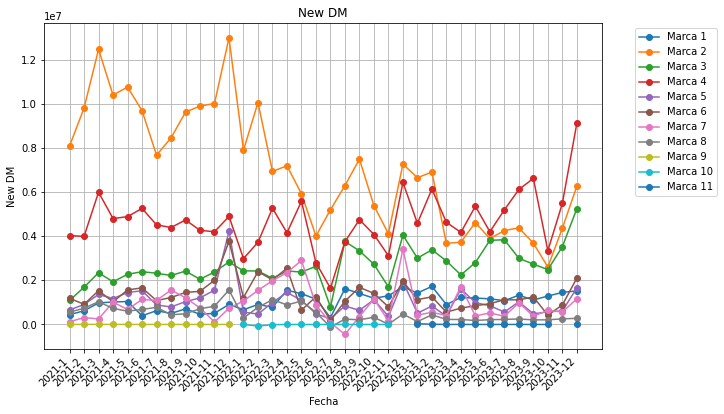

In [44]:
plt.figure(figsize=(10, 6))
for columna in dataframe_consolidado2.columns:
    plt.plot(dataframe_consolidado2.index, dataframe_consolidado1[columna], marker='o', linestyle='-', label=columna)
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Fecha')
plt.ylabel('New DM')
plt.title(f'New DM')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [45]:
Resultados1['Precio']= Resultados1['New NR']/Resultados1['New Vol']
Resultados1

,Año,Mes,Marca,New Vol,New NR,New DN,Precio
0,2021,1,Marca 1,5405.309564,4.450753e+05,2670,82.340397
1,2021,1,Marca 2,76184.199271,8.086892e+06,5443,106.149202
2,2021,1,Marca 3,9005.347750,1.085043e+06,4120,120.488791
3,2021,1,Marca 4,34901.062904,4.025846e+06,4817,115.350248
4,2021,1,Marca 5,4080.766579,6.585441e+05,3481,161.377540
...,...,...,...,...,...,...,...
319,2023,12,Marca 5,8384.235652,1.652341e+06,2793,197.077068
320,2023,12,Marca 6,8042.268416,2.098800e+06,3718,260.971125
321,2023,12,Marca 11,0.000000,0.000000e+00,0,NaN
322,2023,12,Marca 7,5954.103502,1.161529e+06,2630,195.080431


In [46]:
Resultados1['Precio']=Resultados1['New NR']/Resultados1['New Vol']
Resultados1
Resultados1

,Año,Mes,Marca,New Vol,New NR,New DN,Precio
0,2021,1,Marca 1,5405.309564,4.450753e+05,2670,82.340397
1,2021,1,Marca 2,76184.199271,8.086892e+06,5443,106.149202
2,2021,1,Marca 3,9005.347750,1.085043e+06,4120,120.488791
3,2021,1,Marca 4,34901.062904,4.025846e+06,4817,115.350248
4,2021,1,Marca 5,4080.766579,6.585441e+05,3481,161.377540
...,...,...,...,...,...,...,...
319,2023,12,Marca 5,8384.235652,1.652341e+06,2793,197.077068
320,2023,12,Marca 6,8042.268416,2.098800e+06,3718,260.971125
321,2023,12,Marca 11,0.000000,0.000000e+00,0,NaN
322,2023,12,Marca 7,5954.103502,1.161529e+06,2630,195.080431


In [47]:
Resultados1['Intercepto'] = 1
datos_reemplazados = Resultados1.replace(np.nan, 0)
datos_filtrados = datos_reemplazados[datos_reemplazados['Marca'] == 'Marca 4']

modelo = sm.OLS(datos_filtrados['New Vol'], datos_filtrados[['Precio', 'Intercepto']])
resultado = modelo.fit()

coeficientes = resultado.params

elasticidad = coeficientes['Precio'] * (datos_filtrados['Precio'].mean() / datos_filtrados['New Vol'].mean())

print("Elasticidad precio de la demanda:", abs(elasticidad))

Elasticidad precio de la demanda: 1.5803677032369923


In [48]:
Resultados1['Intercepto'] = 1
datos_reemplazados = Resultados1.replace(np.nan, 0)
datos_filtrados = datos_reemplazados[datos_reemplazados['Marca'] == 'Marca 2']

modelo = sm.OLS(datos_filtrados['New Vol'], datos_filtrados[['Precio', 'Intercepto']])
resultado = modelo.fit()

coeficientes = resultado.params

elasticidad = coeficientes['Precio'] * (datos_filtrados['Precio'].mean() / datos_filtrados['New Vol'].mean())

print("Elasticidad precio de la demanda:", abs(elasticidad))

Elasticidad precio de la demanda: 1.6299574197081277


Si la elasticidad precio es mayor que 1, esto indica que la cantidad demandada es más sensible que el cambio en el precio. Es decir, un cambio porcentual en el precio provoca un cambio porcentual mayor en la cantidad demandada.
Ejemplo: Si la elasticidad precio es 1.5 y el precio aumenta en un 10%, la cantidad demandada disminuirá en un 15%.

In [49]:
bases_de_datos['Marca 4']['New Vol']

Fecha
2021-1     34901.062904
2021-2     33763.637289
2021-3     51877.781021
2021-4     42648.786273
2021-5     42775.676722
2021-6     46816.050723
2021-7     40614.692525
2021-8     39066.269766
2021-9     42212.304968
2021-10    39300.494072
2021-11    37329.406122
2021-12    44129.311019
2022-1     27297.288750
2022-2     35040.222480
2022-3     48569.035680
2022-4     38927.673360
2022-5     50545.528140
2022-6     28334.191940
2022-7     23360.467680
2022-8     35080.322550
2022-9     41216.895200
2022-10    35640.751010
2022-11    29625.814920
2022-12    56204.023555
2023-1     37628.932140
2023-2     49392.321300
2023-3     37726.299720
2023-4     35533.461600
2023-5     45902.399700
2023-6     37644.151800
2023-7     43924.332760
2023-8     52345.131960
2023-9     56008.521963
2023-10    30736.554583
2023-11    44051.225269
2023-12    71342.116762
Name: New Vol, dtype: float64

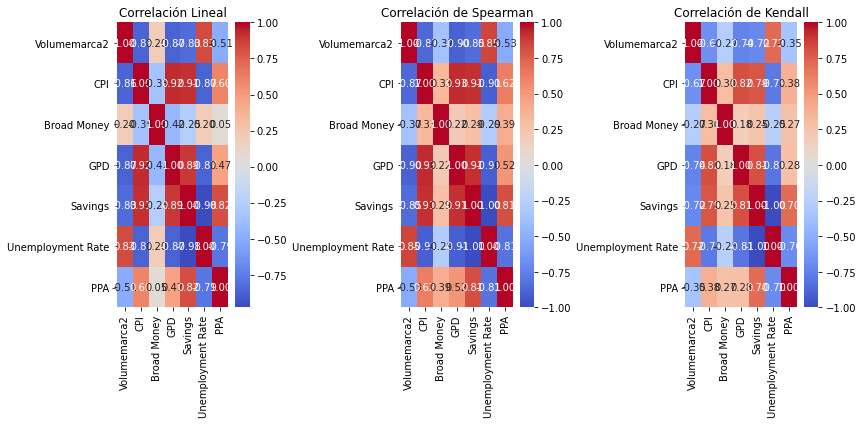

In [50]:
datos=pd.DataFrame({'Volumemarca2':  bases_de_datos['Marca 2']['New Vol'],'CPI': qa['CPI'],'Broad Money':qa['Broad Money'],'GPD':qa['GPD'],'Savings':qa['Savings'],'Unemployment Rate':qa['Unemployment Rate'],'PPA':qa['PPA']})
correlacion_lineal = datos.corr()
correlacion_spearman = datos.corr(method='spearman')
correlacion_kendall = datos.corr(method='kendall')

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.heatmap(correlacion_lineal, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación Lineal')

plt.subplot(1, 3, 2)
sns.heatmap(correlacion_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de Spearman')

plt.subplot(1, 3, 3)
sns.heatmap(correlacion_kendall, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de Kendall')

plt.tight_layout()
plt.show()

In [51]:
datos

,Volumemarca2,CPI,Broad Money,GPD,Savings,Unemployment Rate,PPA
2021-1,76184.199271,98.744918,45.918736,38.207765,14.205019,11.842896,0.371784
2021-2,89129.167791,99.075215,45.918736,38.207765,14.205019,11.842896,0.371784
2021-3,116251.423855,99.291946,45.918736,38.207765,14.205019,11.842896,0.371784
2021-4,96476.944323,99.367999,36.831127,39.801554,14.205019,11.842896,0.356896
2021-5,101892.068695,99.482510,36.831127,39.801554,14.205019,11.842896,0.356896
2021-6,93817.371981,99.654597,36.831127,39.801554,14.205019,11.842896,0.356896
2021-7,73991.667222,100.109923,37.959337,42.115131,14.205019,11.842896,0.337290
2021-8,78756.113383,100.367862,37.959337,42.115131,14.205019,11.842896,0.337290
2021-9,88926.567658,100.671244,37.959337,42.115131,14.205019,11.842896,0.337290
2021-10,88045.114749,101.124142,37.445311,42.820987,14.205019,11.842896,0.331730


Train MSE: 239456041.56053025
Train RMSE: 15474.367242654229
Train R^2: 0.6651400166402265
Test MSE: 123843713.14892629
Test RMSE: 11128.509026321823
Test R^2: 0.4059777493528819


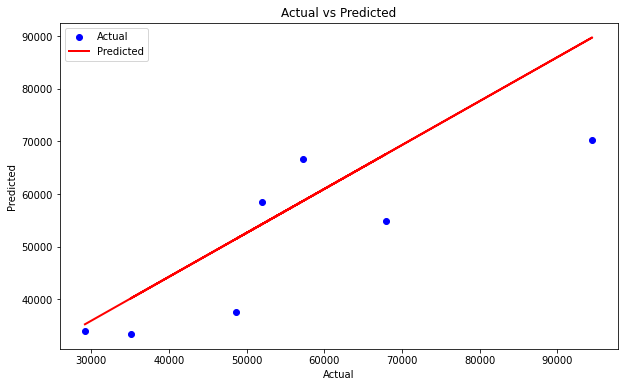

In [123]:
time_series = datos['Volumemarca2']

X = time_series[:-1].values.reshape(-1, 1)  
y = time_series[1:].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

print("Train MSE:", mse_train)
print("Train RMSE:", rmse_train)
print("Train R^2:", r2_train)

y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)
print("Test R^2:", r2_test)


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_test, color='red', linewidth=2, label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [129]:
model = LinearRegression()

# Ajusta el modelo a los datos
X=datos[['CPI','GPD','Savings']]
y=datos['Volumemarca2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print('Coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)

y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

print("Train MSE:", mse_train)
print("Train RMSE:", rmse_train)
print("Train R^2:", r2_train)

y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred_test)

print('MSE:', mse)
print('RMSE:', rmse)
print('R^2:', r2)
print('MAE:', mae)


Coeficientes: [-4471.89493781 -3191.30503464 -1542.80668331]
Intercepto: 689856.5346625998
Train MSE: 138088375.14992255
Train RMSE: 11751.101018624704
Train R^2: 0.7889794644497669
MSE: 133269598.86228219
RMSE: 11544.245270362293
R^2: 0.6608664632734174
MAE: 9119.792095432113


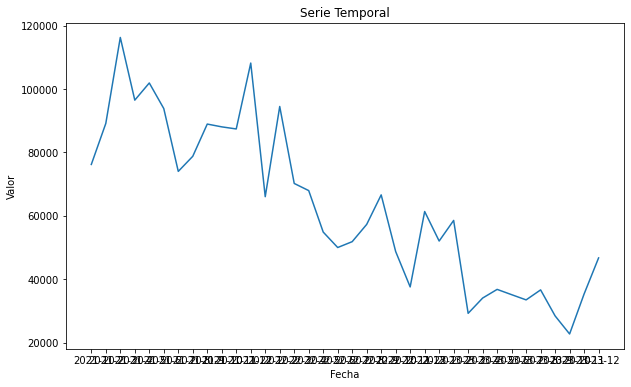

Estadísticas ADF: -1.1460526583489636
Valor p: 0.6963618075799263
Valores críticos:
   1%: -3.639224104416853
   5%: -2.9512301791166293
   10%: -2.614446989619377


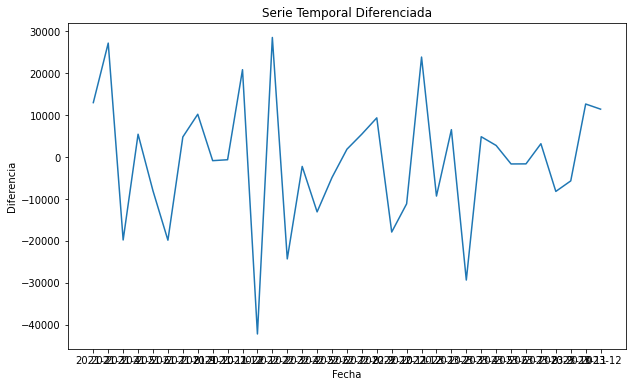

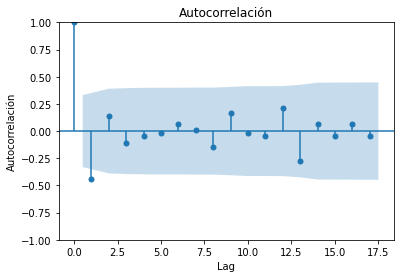

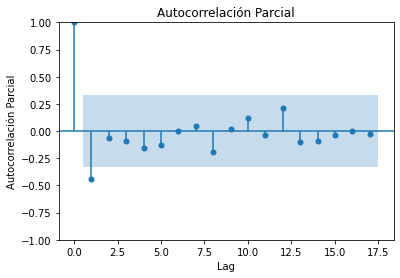

In [156]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 6))
plt.plot(datos['Volumemarca2'])
plt.title('Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

result = adfuller(datos['Volumemarca2'])
print('Estadísticas ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


data_diff = data.diff().dropna()


plt.figure(figsize=(10, 6))
plt.plot(data_diff['Volumemarca2'])
plt.title('Serie Temporal Diferenciada')
plt.xlabel('Fecha')
plt.ylabel('Diferencia')
plt.show()


plot_acf(data_diff['Volumemarca2'], lags=17)
plt.title('Autocorrelación')
plt.xlabel('Lag')
plt.ylabel('Autocorrelación')
plt.show()

plot_pacf(data_diff['Volumemarca2'], lags=17)
plt.title('Autocorrelación Parcial')
plt.xlabel('Lag')
plt.ylabel('Autocorrelación Parcial')
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Volumemarca2   No. Observations:                   36
Model:                 ARIMA(6, 0, 1)   Log Likelihood                -393.857
Date:                Wed, 01 May 2024   AIC                            805.714
Time:                        00:37:57   BIC                            819.965
Sample:                    01-01-2021   HQIC                           810.688
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.318e+04   2.24e+04      2.815      0.005    1.92e+04    1.07e+05
ar.L1          0.2744      2.343      0.117      0.907      -4.317       4.866
ar.L2          0.4414      1.210      0.365      0.7

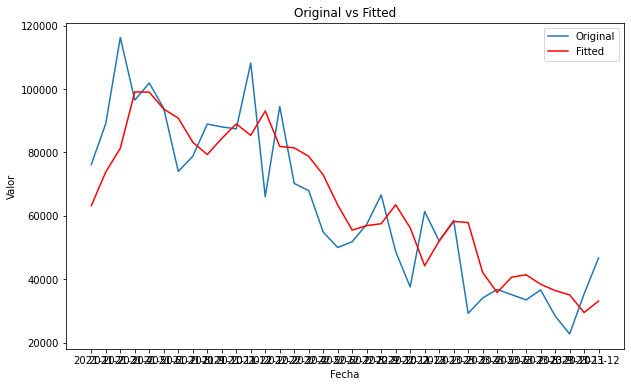

Pronósticos: 2024-01-01    43510.088408
2024-02-01    45806.009906
2024-03-01    43610.618340
Freq: MS, Name: predicted_mean, dtype: float64


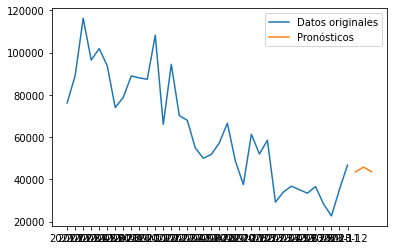

AIC: 805.7138071497468


In [161]:
import statsmodels.api as sm

time_series = datos['Volumemarca2']
p = 6  
d = 0
q = 1  

model = sm.tsa.ARIMA(time_series, order=(p, d, q))
results = model.fit()

print(results.summary())

plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.title('Original vs Fitted')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

predictions = results.forecast(steps=3) 
print("Pronósticos:", predictions)

# Grafica los pronósticos junto con los datos originales
plt.plot(time_series, label='Datos originales')
plt.plot(np.arange(len(time_series), len(time_series) + len(predictions)), predictions, label='Pronósticos')
plt.legend()
plt.show()

# También puedes obtener el AIC del modelo
aic = results.aic
print("AIC:", aic)

In [165]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

time_series = datos['Volumemarca2']


# Verificar la estacionariedad de las series temporales
def check_stationarity(df):
    stationary = True
    for column in df.columns:
        result = adfuller(df[column])
        print(f'ADF Statistic for {column}: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        if result[1] > 0.05:
            print(f'{column} is not stationary.')
            stationary = False
        else:
            print(f'{column} is stationary.')
    return stationary

# Verificar la estacionariedad de la serie temporal
result = adfuller(time_series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')
if result[1] > 0.05:
    print("La serie temporal no es estacionaria. Realizar la diferenciación.")
    time_series_diff = time_series.diff().dropna()
    result_diff = adfuller(time_series_diff)
    print(f'ADF Statistic after differencing: {result_diff[0]}')
    print(f'p-value after differencing: {result_diff[1]}')
    if result_diff[1] > 0.05:
        print("La diferenciación no ha producido una serie estacionaria. Considerar otras técnicas.")
    else:
        print("La serie temporal diferenciada ahora es estacionaria.")
        # Ajustar el modelo VAR en la serie temporal diferenciada
        model = VAR(time_series_diff)
        results = model.fit()
        print(results.summary())
else:
    print("La serie temporal es estacionaria.")
    # Ajustar el modelo VAR en la serie temporal original
    model = VAR(time_series)
    results = model.fit()
    print(results.summary())


ADF Statistic: -1.1460526583489636
p-value: 0.6963618075799263
Critical Values:
   1%: -3.639224104416853
   5%: -2.9512301791166293
   10%: -2.614446989619377
La serie temporal no es estacionaria. Realizar la diferenciación.
ADF Statistic after differencing: -9.170326540131782
p-value after differencing: 2.3980355978744934e-15
La serie temporal diferenciada ahora es estacionaria.


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ValueError: Only gave one variable to VAR

In [1]:
#data =  datos

#with pm.Model() as model:
    # Especifica la distribución a priori para los coeficientes del modelo
    # Por ejemplo, coeficientes con distribución normal
 #   beta = pm.Normal('beta', mu=0, sigma=1, shape=(3,3))  # 2 variables, 2 lags
    
    # Definir la distribución a priori para la desviación estándar del error
  #  sigma = pm.HalfNormal('sigma', sigma=1)
    
    # Especifica el modelo VAR
   # y_pred = pm.math.dot(data[['GPD', 'CPI', 'Volumemarca2']].values, beta)
    
    # Definir la distribución de verosimilitud
    #likelihood = pm.Normal('likelihood', mu=y_pred, sigma=sigma, observed=data[['Volumemarca2']].values)
    
    #step = pm.NUTS()  # Utilizar el algoritmo NUTS (No-U-Turn Sampler)
    
    # Realizar muestreo de MCMC
    #trace = pm.sample(1000, tune=1000)##, step=step, cores=1)
    ##posterior_samples = {
    ##'beta': trace['beta'],
    ##'sigma': trace['sigma'],}# Construir un objeto InferenceData
    ##idata = az.convert_to_inference_data(posterior_samples=posterior_samples)

    


In [2]:
# Realizar predicciones
#new_exog_var1_data=data['CPI']
#new_exog_var2_data=data['GPD']
#new_exog_var3_data=data['Volumemarca2']

#with model:
 #   pm.set_data({'GPD': new_exog_var1_data,'CPI': new_exog_var2_data,'Volumemarca2':new_exog_var3_data })
  #  post_pred = pm.sample_posterior_predictive(trace, samples=150)

# Obtener estadísticas resumidas
#summary = pm.summary(trace)

In [4]:
# Definir tus datos
# Asegúrate de que tus datos estén en el formato adecuado para el modelo VAR
# data = ...

#with pm.Model() as model:
    # Especifica la distribución a priori para los coeficientes del modelo
    # Por ejemplo, coeficientes con distribución normal
 #   beta = pm.Normal('beta', mu=0, sigma=1, shape=(3, 3))  # 3 variables, 3 lags
    
    # Definir la distribución a priori para la desviación estándar del error
  #  sigma = pm.HalfNormal('sigma', sigma=1)
    
    # Especifica el modelo VAR
   # y_pred = pm.math.dot(data[['GPD', 'CPI', 'Volumemarca2']].values, beta)
    
    # Definir la distribución de verosimilitud
    #likelihood = pm.Normal('likelihood', mu=y_pred, sigma=sigma, observed=data['Volumemarca2'].values)
    
    # Realizar muestreo de MCMC
    #trace = pm.sample(100, tune=10)

# Realizar predicciones
#with model:
 #   pm.set_data({'GPD': data['CPI'], 'CPI':  data['GPD']})
  #  post_pred = pm.sample_posterior_predictive(trace, samples=150)

# Obtener estadísticas resumidas
#summary = pm.summary(trace)